<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [2]:
0.6;

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, he didn't take the new information (captured the troll) into account.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1 and E2

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [5]:
(2/5*1/5)/(2/5*1/5+1/5*1/5+0*3/5);

Probability of the other event given a troll captured: 

In [4]:
(1/5*1/5)/(2/5*1/5+1/5*1/5+0*3/5);

### 1.5

#### What is the chance of the knight crossing safely?

In [7]:
1/3;

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [8]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [9]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [10]:
x = -10:1:10;

In [11]:
y_true = x .^2 .+ 3 .* x .- 2;

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [12]:
noise = Random.rand(di.Normal(0,10),length(x));

In [13]:
y_observed = y_true .+ noise;

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

In [14]:
poly_fit = Polynomials.fit(x,y_observed,2)

Polynomials.Polynomial(-6.569415245140771 + 3.524406229869887*x + 1.0854847518660002*x^2)

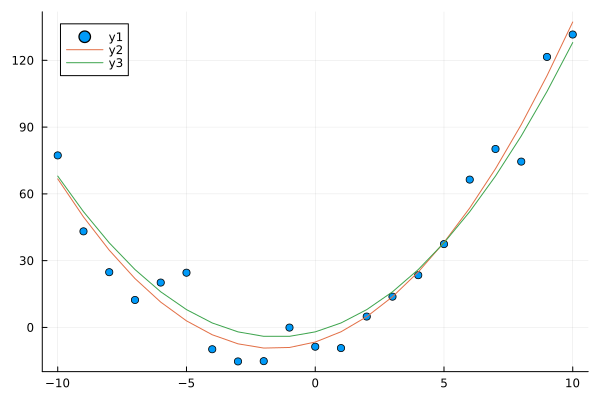

In [15]:
Plots.scatter(x,y_observed)
Plots.plot!(x,poly_fit.(x))
Plots.plot!(x,y_true)

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50
2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

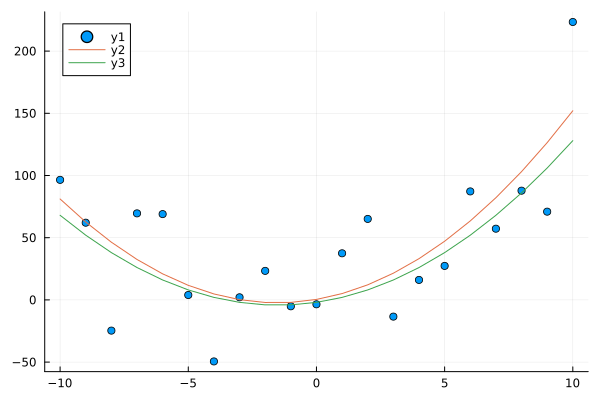

In [16]:
noise = Random.rand(di.Normal(0,50),length(x));
y_observed = y_true .+ noise;
poly_fit = Polynomials.fit(x,y_observed,2)
Plots.scatter(x,y_observed)
Plots.plot!(x,poly_fit.(x))
Plots.plot!(x,y_true)

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


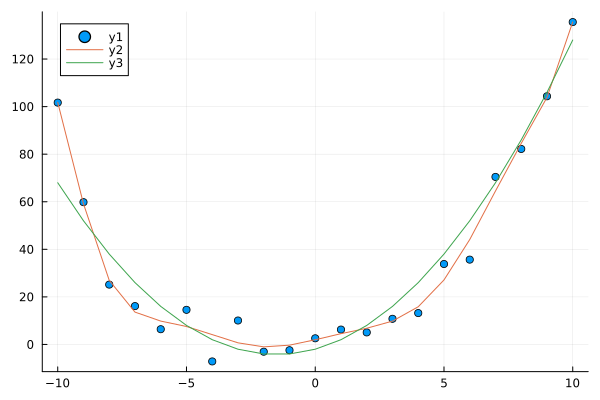

In [17]:
noise = Random.rand(di.Normal(0,10),length(x));
y_observed = y_true .+ noise;
poly_fit = Polynomials.fit(x,y_observed,10)
Plots.scatter(x,y_observed)
Plots.plot!(x,poly_fit.(x))
Plots.plot!(x,y_true)

### 2.5

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x
3. What do you observe in the plot? What this phenomenon is called?

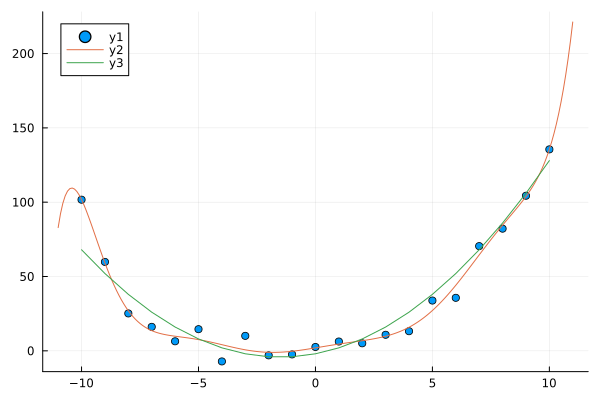

In [18]:
x_fit = -11:0.1:11
Plots.scatter(x,y_observed)
Plots.plot!(x_fit,poly_fit.(x_fit))
Plots.plot!(x,y_true)

The fit doesn't make sense outside the training dataset. It is one of the cases when the model is overfitted, which means the model becomes too specific to the training dataset. 